In [1]:
import pandas as pd

Importing the dataset:

In [2]:
a=pd.read_csv('parkinsson.csv')

In [3]:
a.head()
a.shape

(195, 24)

In [4]:
a.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [5]:
a.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
import seaborn as sns


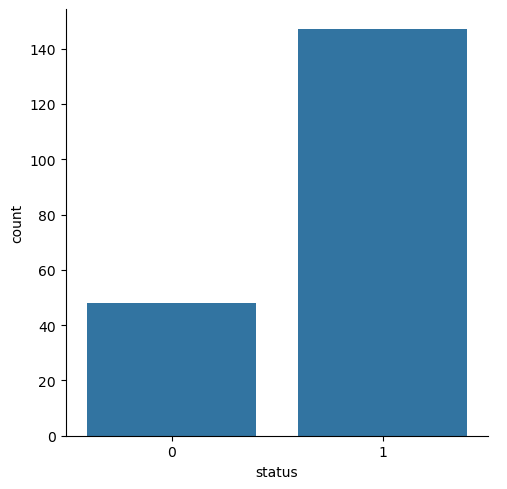

In [7]:
sns.catplot(x='status',kind='count',data=a)

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


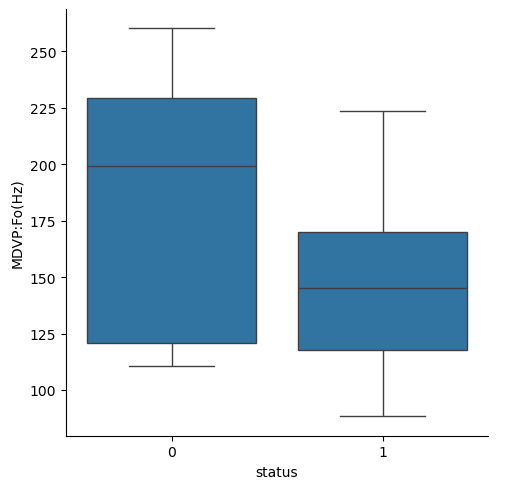

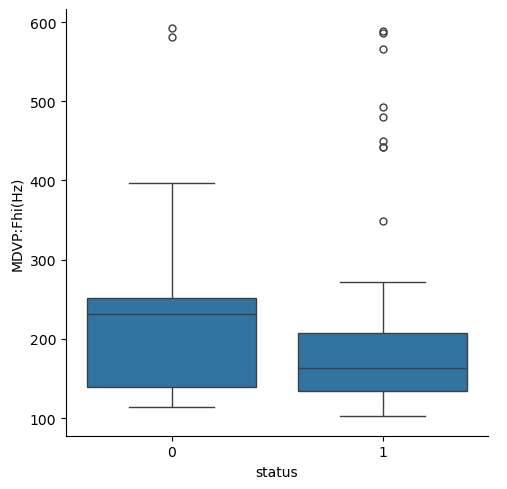

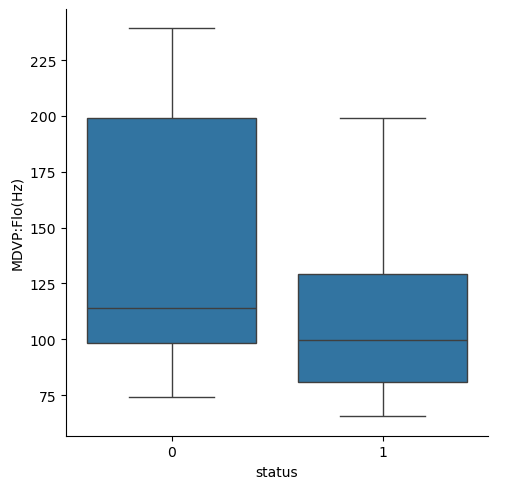

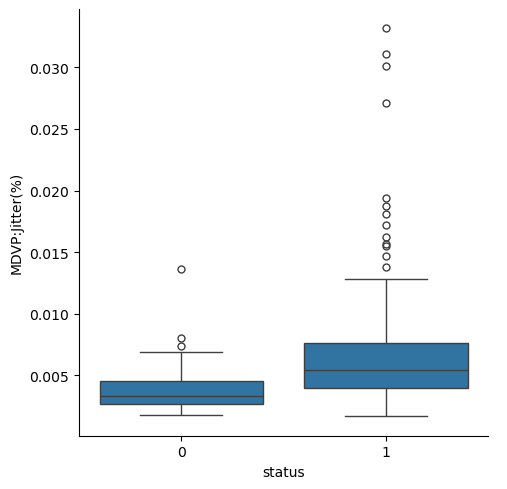

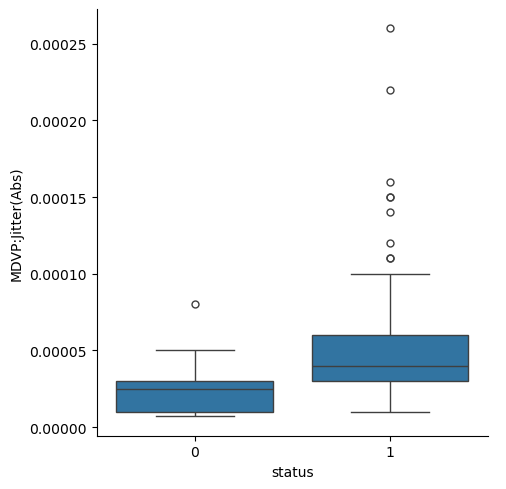

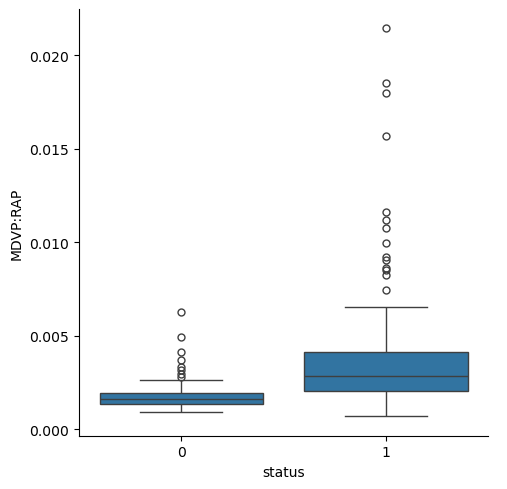

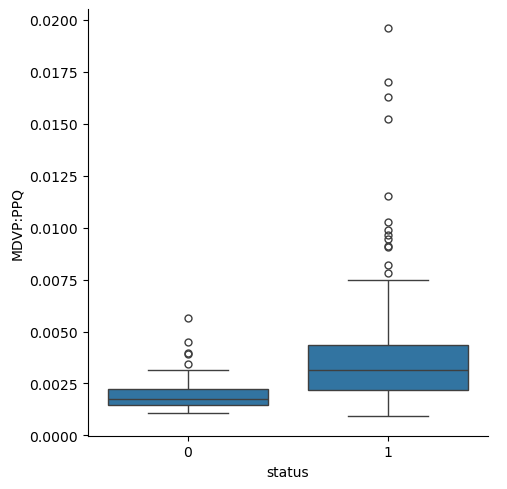

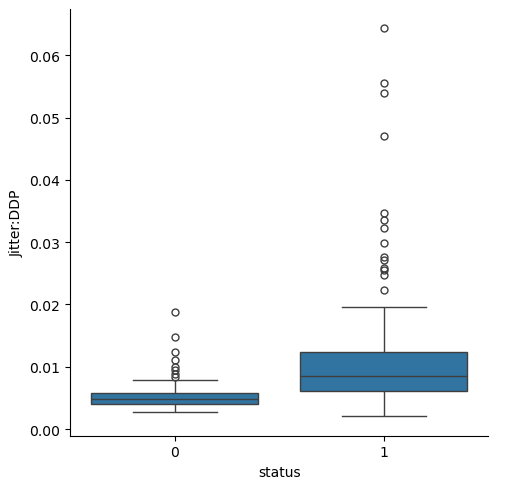

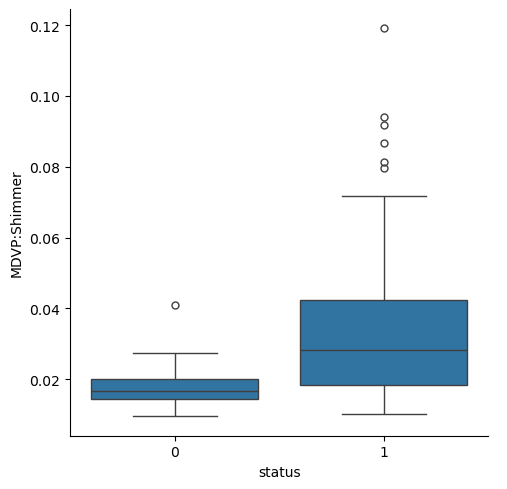

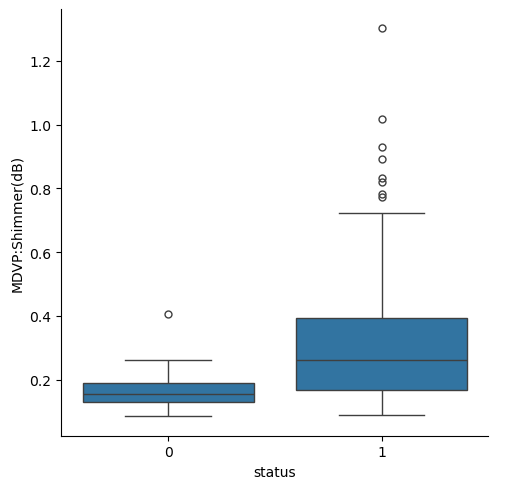

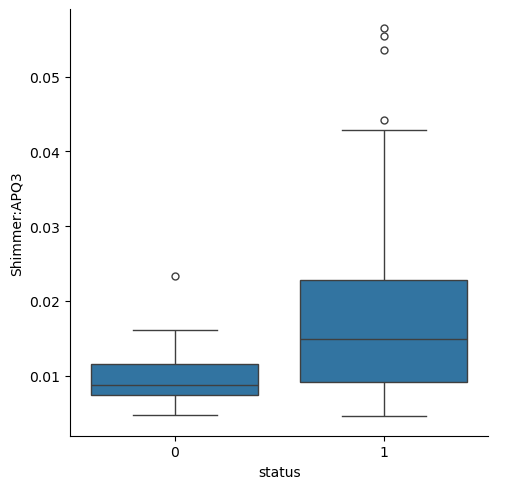

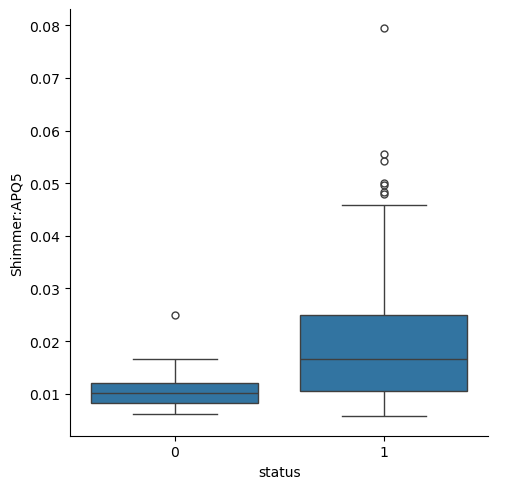

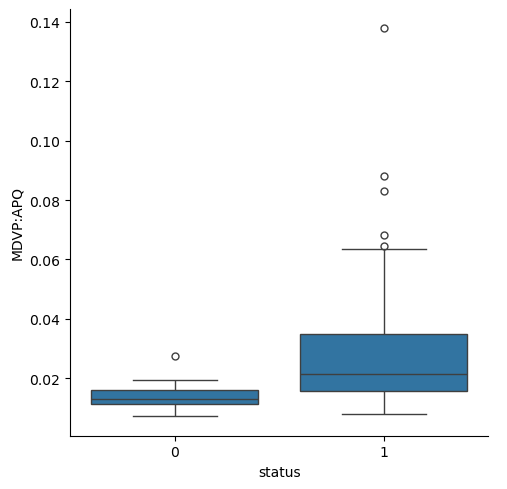

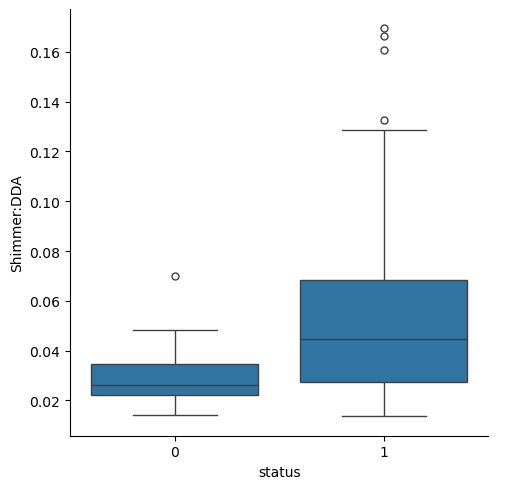

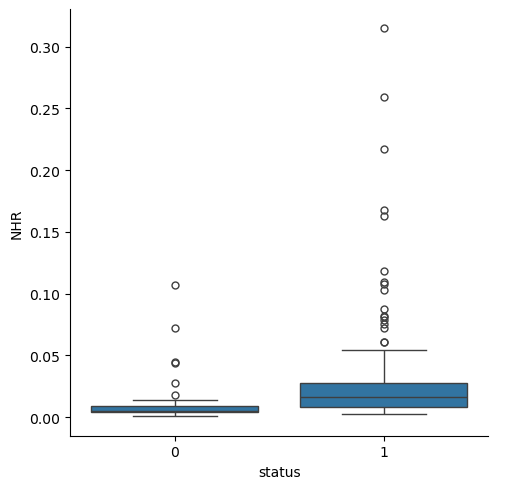

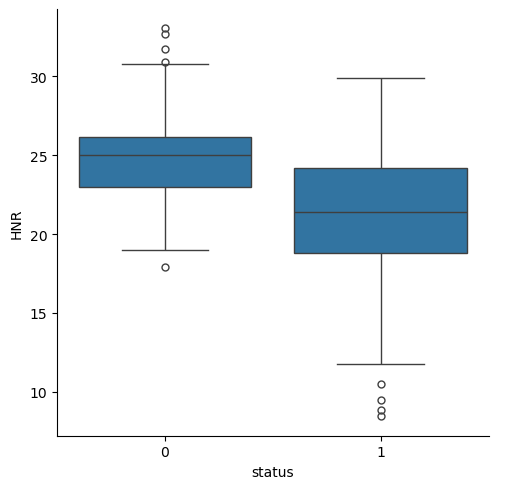

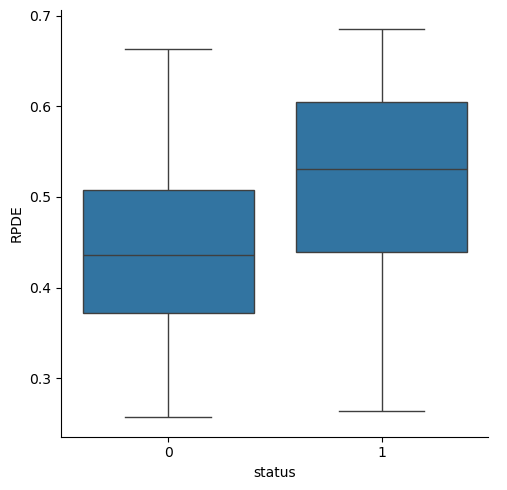

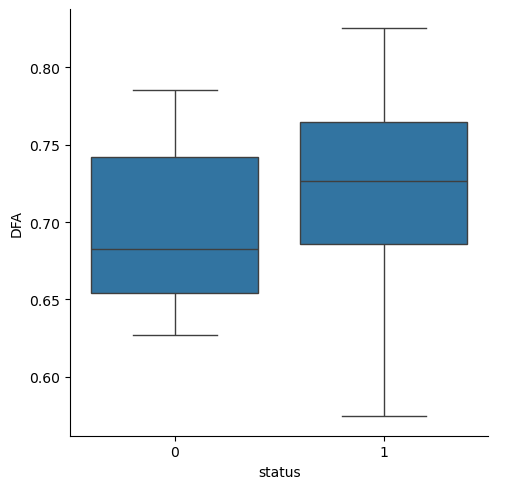

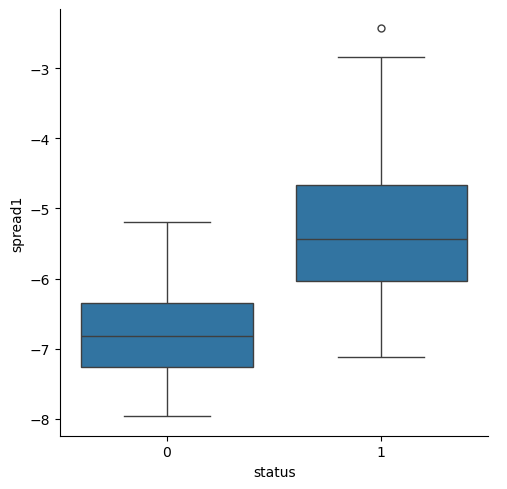

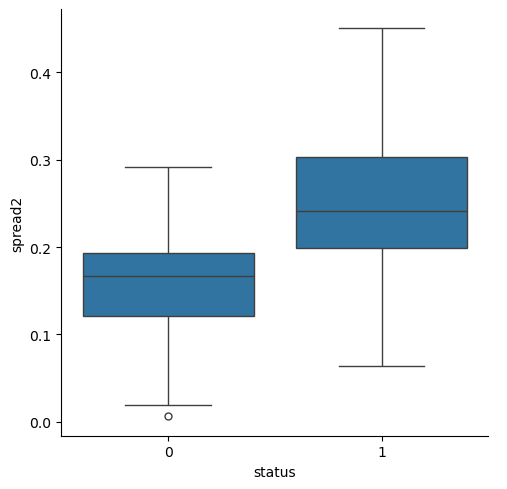

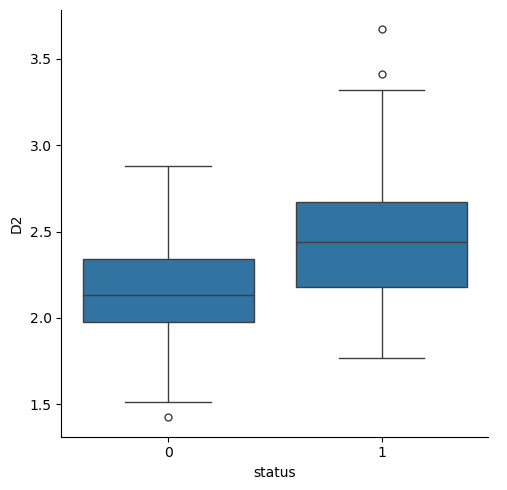

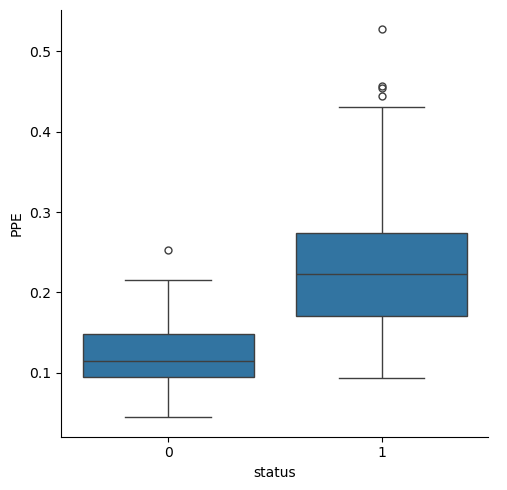

In [8]:
for i in a:
    if i != 'status' and i != 'name':
        sns.catplot(x='status',y=i,kind='box',data=a)

In [9]:
b=a.drop(['name'],axis=1)

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,mean_squared_error

In [11]:
features=a.drop(['status','name'],axis=1)
labels=a['status']

In [12]:
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

In [13]:

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=5)

In [14]:
#cross validation:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRFClassifier,XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier


In [15]:
lr=cross_val_score(LogisticRegression(),x_train,y_train)
xgbc=cross_val_score(XGBRFClassifier(),x_train,y_train)
xgb=cross_val_score(XGBClassifier(),x_train,y_train)
svm=cross_val_score(SVC(),x_train,y_train)
#nb=cross_val_score(MultinomialNB(),x_train,y_train)
dtc=cross_val_score(DecisionTreeClassifier(),x_train,y_train)
adb=cross_val_score(AdaBoostClassifier(),x_train,y_train)
bbc=cross_val_score(BaggingClassifier(),x_train,y_train)
etc=cross_val_score(ExtraTreesClassifier(),x_train,y_train)
gbc=cross_val_score(GradientBoostingClassifier(),x_train,y_train)
rfc=cross_val_score(RandomForestClassifier(),x_train,y_train)
#vc=cross_val_score(VotingClassifier(estimators),x_train,y_train)

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\DELL\an

In [16]:
print('log reg',lr,lr.mean())
print('xgbd',xgbc,xgbc.mean())
print('xgb',xgb,xgb.mean())
print('svm',svm,svm.mean())
#print('nb',nb,nb.mean)
print('dtc',dtc,dtc.mean())
print('adb',adb,adb.mean())
print('bbc',bbc,bbc.mean())
print('etc',etc,etc.mean())
print('gbc',gbc,gbc.mean())
print('rfc',rfc,rfc.mean())
#print('vc',vc,vc.mean)

log reg [0.90625    0.90322581 0.87096774 0.83870968 0.80645161] 0.8651209677419356
xgbd [0.90625    0.93548387 0.90322581 0.96774194 0.80645161] 0.9038306451612904
xgb [0.90625    0.93548387 0.87096774 0.96774194 0.90322581] 0.916733870967742
svm [0.90625    0.90322581 0.87096774 0.87096774 0.87096774] 0.884475806451613
dtc [0.8125     0.87096774 0.83870968 0.90322581 0.93548387] 0.8721774193548388
adb [0.9375     0.87096774 0.90322581 0.93548387 0.83870968] 0.8971774193548387
bbc [0.90625    0.93548387 0.83870968 0.96774194 0.80645161] 0.8909274193548388
etc [0.9375     0.93548387 0.87096774 0.90322581 0.87096774] 0.9036290322580646
gbc [0.90625    0.90322581 0.87096774 0.96774194 0.90322581] 0.9102822580645162
rfc [0.96875    0.93548387 0.87096774 0.93548387 0.87096774] 0.9163306451612904


# XGboost:

First a model is fit using the xgboost algorithm(no parameter tuning is done).

In [17]:
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [18]:
y_predtr=model.predict(x_train)
print(accuracy_score(y_train,y_predtr)*100)

100.0


In [19]:

    y_pred=model.predict(x_test)
    print(accuracy_score(y_test, y_pred)*100)

92.3076923076923


# Extra trees classifier:

In [20]:
model=ExtraTreesClassifier()
model.fit(x_train,y_train)

ExtraTreesClassifier()

In [21]:
 y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

92.3076923076923


In [22]:
y_predtr=model.predict(x_train)
print(accuracy_score(y_train,y_predtr)*100)

100.0


In [23]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39

[[ 8  2]
 [ 1 28]]


In [24]:
y_pred=pd.DataFrame(y_pred)
y_pred

,0
0,1
1,0
2,0
3,1
4,0
5,1
6,1
7,1
8,1
9,0


In [25]:
# Dictionary of algorithms and their accuracy scores
algorithms = {
    "Logistic Regression": lr.mean(),
    "XGBRFClassifier": xgbc.mean(),
    "XGBClassifier": xgb.mean(),
    "SVC": svm.mean(),
    "Decision Tree Classifier": dtc.mean(),
    "AdaBoost Classifier": adb.mean(),
    "Bagging Classifier": bbc.mean(),
    "Extra Trees Classifier": etc.mean(),
    "Gradient Boosting Classifier": gbc.mean(),
    "Random Forest Classifier": rfc.mean()
}

# Print each algorithm with its accuracy score
for algorithm, accuracy in algorithms.items():
    print(f"{algorithm}: {accuracy:.2f}")

Logistic Regression: 0.87
XGBRFClassifier: 0.90
XGBClassifier: 0.92
SVC: 0.88
Decision Tree Classifier: 0.87
AdaBoost Classifier: 0.90
Bagging Classifier: 0.89
Extra Trees Classifier: 0.90
Gradient Boosting Classifier: 0.91
Random Forest Classifier: 0.92


In [29]:
import os

# Ensure the directory exists
current_dir = os.getcwd()
model_dir = os.path.join(current_dir, 'Parkinson_Disease')

# Check if the directory exists, if not, create it
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'model1.pkl')
scaler_path = os.path.join(model_dir, 'scaler.pkl')

# Save Model & Scaler
with open(model_path, 'wb') as file:
    pickle.dump(model, file)

with open(scaler_path, 'wb') as file:
    pickle.dump(scaler, file)

# Load Model & Scaler (if needed later)
with open(model_path, 'rb') as file:
    loaded_model = pickle.load(file)

with open(scaler_path, 'rb') as file:
    loaded_scaler = pickle.load(file)

print("Model and Scaler Saved Successfully!")


Model and Scaler Saved Successfully!


In [30]:
import joblib
model = joblib.load('model1.pkl')
print(type(model))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [31]:
import numpy as np
import joblib

# ✅ Load the trained model
model = joblib.load('model1.pkl')

# ✅ Check if the model is fitted
if hasattr(model, "predict"):
    print("✅ Model is loaded and ready to predict!")
else:
    print("❌ Model is not fitted yet.")

# Test the loaded model
print(loaded_model.predict(x_test))

✅ Model is loaded and ready to predict!
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [34]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
import pickle

# Load your dataset
df = pd.read_csv("parkinsson.csv")  # Replace with actual file

# Select only the required 10 features
selected_features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Shimmer',
                     'HNR', 'RPDE', 'DFA', 'spread1', 'spread2']
X = df[selected_features]
y = df['status']  # Ensure the target variable is correct

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the new model
# Ensure the directory exists
current_dir = os.getcwd()
model_dir = os.path.join(current_dir, 'Parkinson_Disease')

# Check if the directory exists, if not, create it
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Save the model to the specified directory
model_path = os.path.join(model_dir, 'model1.pkl')
with open(model_path, "wb") as file:
    pickle.dump(model, file)

In [35]:
import pickle
import numpy as np

# Load the trained model
with open('model1.pkl', 'rb') as file:
    model = pickle.load(file)

# Example input (use real test values)
sample_input = np.array([119.992, 157.302, 74.997, 0.00784, 0.044, 21.033, 0.414, 0.815, -4.813, 0.266]).reshape(1, -1)

# Predict
try:
    result = model.predict(sample_input)[0]
    print("Test Prediction:", 'Parkinson’s Detected' if result == 1 else 'No Parkinson’s')
except Exception as e:
    print("Model Error:", str(e))


Test Prediction: No Parkinson’s


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.1 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
